
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W11/Hw5.ipynb)





In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [54]:
def download_data():  ### This dude will download the dataset from the directory directly!
  import requests
  url = "https://raw.githubusercontent.com/y-akbal/Tedu_Time_Series/main/W11/hw.csv"
  res = requests.get(url, allow_redirects=True)
  with open('hw.csv','wb') as file:
    file.write(res.content)

download_data()  

In [55]:
data = pd.read_csv("hw.csv")

In [56]:
data = data.iloc[:,-1]### we pick up the last column

In [57]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

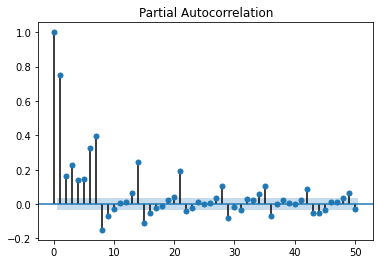

In [60]:
plot_pacf(data, lags = 50);     ##### by looking at this data what do you say?

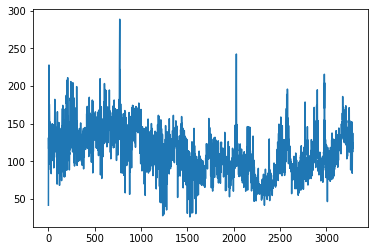

In [59]:
plt.plot(data)  #### data has some seasonal components but we do not care about this!

#
Split into test and train
#

In [9]:
n = len(data)
alpha = 0.8 ### where to split the data
N = int(n*alpha)
train = data[:N]
test = data[N:]

##
Splitting each data into $X,y$
##

In [36]:
def sliding_window(data_, lag_size = 50):  #### we picked the 50 here basically by looking at the first picture.
  N = len(data_)
  data = np.array(data_)
  X = []
  y = []
  for i in range(N-lag_size-1):
    X.append(data[i:i+lag_size])
    y.append(data[i+lag_size])
  return np.array(X), np.array(y)

In [61]:
X_train, y_train = sliding_window(train, 50)
X_test, y_test = sliding_window(test, 50)

In [87]:
import sklearn  #### initial guess, see what we can get for free!!!!
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_jobs = -1)
knn.fit(X_train, y_train),
knn.score(X_test, y_test)

0.5669886587501936

In [68]:
from sklearn.neural_network import MLPRegressor #### ok WE may expect something like 0.70 may be?? on cross validation
mlp = MLPRegressor()
mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)

0.702342391410836

##We know use time series generator guy!

In [66]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [72]:
splitter = TimeSeriesSplit(n_splits = 5) #### this is the cross validation object

In [94]:
knn_params = {"n_neighbors":range(3,7), "weights":["uniform", "distance"]}  ### parameters of knn
mlp_params = {"hidden_layer_sizes":range(5, 40)}

## Here the cross validation is to be managed by time series split object!

In [95]:
cv = GridSearchCV(mlp, param_grid = mlp_params, n_jobs = -1, cv = splitter)
cv.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'hidden_layer_sizes': range(5, 40)})

In [96]:
cv.best_params_

{'hidden_layer_sizes': 34}

In [97]:
mlp_best = MLPRegressor(34)  #### we are good!
mlp_best.fit(X_train, y_train)
mlp_best.score(X_test, y_test)

0.7184631306724077

In [89]:
cv = GridSearchCV(knn, param_grid = knn_params, n_jobs = -1, cv = splitter)  #### this takes a lot of time... gotta wait.
cv.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=KNeighborsRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': range(3, 7),
                         'weights': ['uniform', 'distance']})

In [90]:
cv.best_params_

{'n_neighbors': 6, 'weights': 'uniform'}

In [93]:
knn = KNeighborsRegressor(**cv.best_params_) ### nothing really important!!!! 
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.5807890365262658